<h1> Regression Notes </h1>

- Regression can be simply  computed by taking the weighted sum of input features plus a constant called the "bias term"
- Common way to measure it is using RMSE (Root Mean Squared Error)
- To minimize RMSE, we need to find the values theta (coefficient of input features).
- We want to minimise the MSE which can be easier than RMSE.
- Minimising RMSE and MSE leads to the same result since the value that minimises a function also minimizes the square root.

In [25]:
#import necessary libraries for data wrangling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

Let's use multiple-linear regression to predict the income of a person based of two key variables:
- Age: Age of person
- Experience: No. of years a user has worked

In [26]:
#Load some data from kaggle
import os
import pandas as pd

# Specify the path to the directory you want to search in
path = "C:\\Users\\jaspe\\OneDrive\\Documents"

# Specify the name of the file you're looking for
file_to_find = "multiple_linear_regression_dataset.csv"

# Use os.listdir to get a list of all files in the directory
for file in os.listdir(path):
    if file == file_to_find:
        # Now you can read the file as a CSV using pandas
        data = pd.read_csv(os.path.join(path, file))
data


,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


Let's look at what the relationship is between our variables

<Axes: xlabel='age', ylabel='income'>

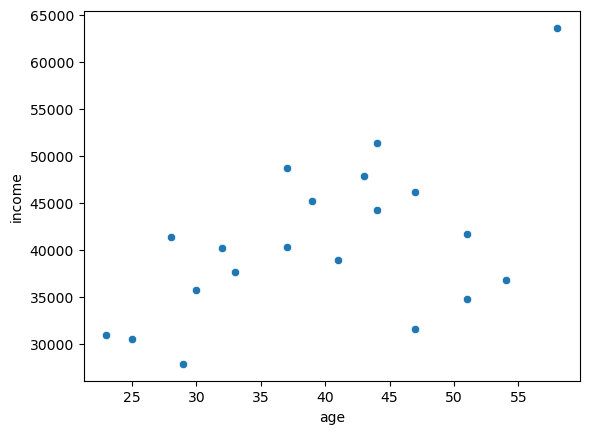

In [27]:
sns.scatterplot(x=data['age'], y=data['income'])

<Axes: xlabel='experience', ylabel='income'>

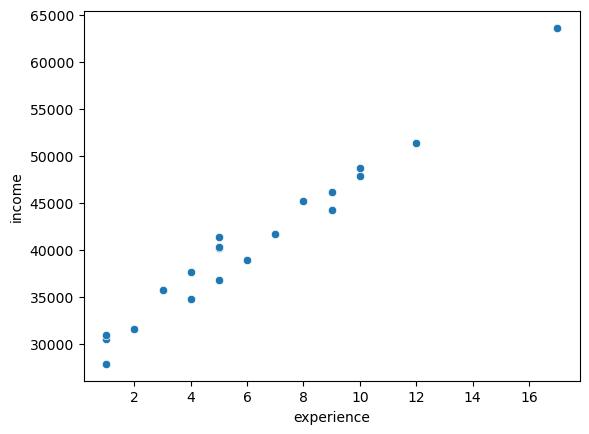

In [28]:
sns.scatterplot(x=data['experience'], y=data['income'])

<Axes: xlabel='experience', ylabel='income'>

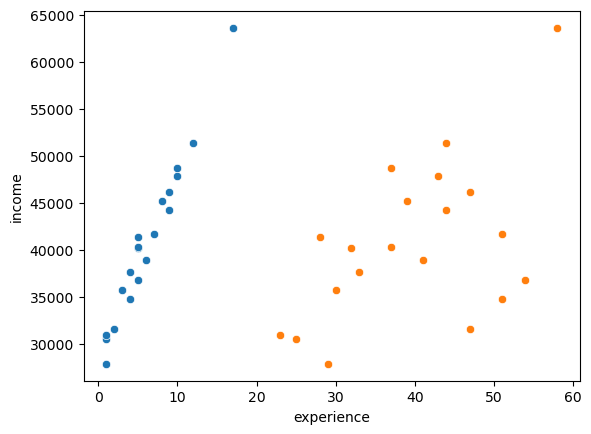

In [29]:
#combine them into one plot
sns.scatterplot(x=data['experience'], y=data['income'])
sns.scatterplot(x=data['age'], y=data['income'])

We can clearly see that the relationship between income and age is "polynomial" in nature whilst relationship between income and experience is linear. 

In [30]:
X = data[['experience']] #independent variable
y = data['income'] #dependent variable

To perform basic linear regression analysis, we do the following:

In [31]:
lr = LinearRegression() #instantiate 
lr_fit = lr.fit(X, y) #fit/train model

To find the intercepts and coefficients:

In [32]:
lr.intercept_, lr.coef_

(28248.446782178216, array([2014.04084158]))

Let's predict the income of a person based of the model above using the following example:
- Experience = 3

In [33]:
X_test = [[3]] #initialise age and experience as array

y_pred = lr_fit.predict(X_test) #predict our income
y_pred

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34290.56930693])

Therefore, our predicted income is $34,290 if an individual's experience was 3 years.

The computational time of LinearRegression() is $O(n^{2})$. Since the normal equation computes the psuedoinverse (a standard matrix factorization technique called SINGULAR VALUE DECOMPOSITION (SVD)), if you double the number of features in the model, you multiply the computational time by 4.

Normal regression (least-squares) has a few issues with it:
- It is not efficient to use normal linear regression if the no. of features in our dataset is less than the no. of trainin instances
- If some features are considered redundant

However, the computational complexity is linear with regards to:
- No. of instancecs you want to make predictions on
- No. of features

Therefore, it can handle large trainingn sets provided that it can fit in your memory.

Once your linear regression model is trained, it takes very little time to predict since the computational complexity is linear with regards to the no. of instances and no. of features e.g. if you increase the no. of instances (or no. of features) twice, it will take twice as long to predict.

<h1>Gradient Descent</h1>

Gradient Descent algorithms are responsible for helping the training rate of models by helping optimize and tweak parameters to minimize the cost function. 

- Gradient Descent takes the no. of steps $\theta$ and the local gradient/steepness at that stepping point until it reaches a global minimum once the gradient becomes 0. 
- Gradient Descent tries to fill the stepping size with values (random initialization.
- The goal is to minimize the cost function as much as possible (using MSE)
- Step size is important to the learning rate:
    - Step size is too big = may end up diverging from global minimum
    - Step size is to small = will take a long time for the model to train due to low learning rates

Sometimes, the cost function may not be perfectly concave (regular bowl) shaped and may contain ridges and bumps along the way, smaller dips along the cost function are known as local minimum.
- If random initialization $\theta$ starts on the left, it will reach a local minimum
- If random initialization starts on the right, it will take a long time
- If we stop early, we may never reach the global minimum

The MSE cost function is convex in nature, meaning if we take two points from the function and run a line segment between them, it will it never intersect the curve -> no local minimums -> it's also a conitnous function.

A few other key points:
- Gradient descent can get very close the the global minimum (if we wait long enough and the learning rate isnt too high)

Visually speaking, Gradient Descent algorithms approach the global minimum in a straight manner but if the data is scaled, the shape will become elongated and approach the global minimum at an orthogonal angle. 

<b>NOTE: YOU MUST SCALE YOUR FEATURES using StandardScaler() or else due to the magnitude and scale of the original dat, it could take a long time to converge.</b>


<h2>Batch Gradient Descent</h2>


Batch gradient descent attempts to calculate the local gradient at each point of $\theta$ bit by bit. Essentially we are taking the partial derivative at each point. 

Batch Gradient Descent has one main downfall:
- Batch Gradient descent looks at the full training set of your data at each instance/epoch and hence it can take a very long time to train your models and can be terribly slow as the number of training instances increase.

But...
- Gradient descent algorithms can scale well as the no. of features increase, therefore training a linear regression model on data with large no. of features will be quicker with Gradient descent rather than using normal least squares.




X_b = np.c_[np.ones((20,1)), X]

eta = 0.1
n_iterations = 1000
m = 20

theta = np.random.randn(20,3)

for iteration in range(n_iterations):

    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    
    theta = theta - eta*gradients

If the cost function is convex (in most cases for MSE cost functions), Batch Gradient Descent with a fixed learning rate, it will eventually reach an optimal solution. 

<h2>Stochastic Gradient Descent</h2>

Stochastic Gradient Descent randomly selects values of $\theta$ rather than using the full training set at each step. This means that the gradient will be calculated at that point alone. 
- It works on a single instance rather the full instance each time
- Can be used for larger training instances.
- SGD can be good to get out of local minimums due to random "jumping" in error values

Issue however:
- Stochastic methods being random will gently decrease to until it reaches the minimum to which it will continue to "bounce and fluctuate" in error.
- This makes it difficult to attain an optimal minimum
- If the cost function is irregular, it can be easy for the SGD to reach global minimum.

To solve the issue of not reaching the global minimum we can:
- reduce the learning rate
- make the first step sizes larger then slowly decrease it as $\theta$ changes

The function that determines the learning rate is the <b>learning schedule</b>

Thus:
- If learning rate is reduced too quickly -> high chance to get stuck in local minimum
- If learning rate is reduced too slowly -> may jump to suboptimal solutions

If we want our model to iterate through all instances at each epoch, we can shuffle input features i.e
- Shuffle the full training set at the <b>BEGINNING</b> of each epoch

To implement SGD learning rate into a linear regression model...

In [34]:


#eta0 = initial learning rate value
#learning_rate = also known learning schedule, can be 'constant', 'optimal', 'invscaling' 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scale', StandardScaler()),
                ('sgd', SGDRegressor(max_iter = 10000,penalty=None, eta0=0.001, learning_rate='invscaling'))])
X_sgd = data['experience'].values.reshape(-1,1)

pipe.fit(X_sgd, y).named_steps['sgd'].intercept_, pipe.fit(X_sgd, y).named_steps['sgd'].coef_


(array([40733.16027426]), array([8096.09159247]))

By training our linear regression using SGD, we get a different result

<b>NOTE: The coefficients may change drastically due to the randomness of stochastic optimization, choosing random variables of $\theta$.
    <b>This is due to either the learning rate being too big or if you have a lot of features</b>

In [35]:
X_test_sgd = [[3]] #use same test as above with normal equation
pipe.predict(X_test_sgd)

array([34289.03387362])

In terms of our dataset, SGD learning may not be the most applicable since we don't have a large no. of training instances or features, so in this case normal least squares would suffice.

<h2>Mini-batch Gradient Descent</h2>

Instead of finding the gradient based on the full data set (batch) and randomly selecting an instance (stochastic), MBG calculates the gradient based of smaller random sets called <b>mini batches</b>

- Main advantage of mini-batch gradient descent to stochastic gradient descent is you can get performance boosts from hardware opimization of matrix operations.
- MBGD is less erratic that SGD since it focuses on smaller batches. 
- Might still be hard to get out of local minimum
- Batch however still gets to the most optimal solution (although it takes a long time)
- SGD and MBGD can reach an optimal solution if you change/adjust learning schedule

MBGD and SGD still bounces around the optimal solution faster if learning schedule is adjusted. 



In [36]:
# Define the size of the mini-batch
batch_size = 100

scaler = StandardScaler()
X_sgd = scaler.fit_transform(X)

pipe = Pipeline([('scale', StandardScaler()),
                ('sgd', SGDRegressor(max_iter = 10000,penalty=None, eta0=0.001, learning_rate='invscaling'))])
sgd = SGDRegressor()
# Perform mini-batch gradient descent
for i in range(0, X_sgd.shape[0], batch_size):
    sgd.partial_fit(X_sgd[i:i+batch_size], y[i:i+batch_size])
    
print(sgd.intercept_, sgd.coef_)

[4575.09316903] [613.30388673]


predicted income

In [37]:
sgd.predict(X_test)

array([6415.00482921])

<h3>Summary</h3>

Normal Equation: 
- Large m (features): Fast
- Out-of-core support: No
- Large n (size of data): Slow
- Hyperparams: 0
- Scaling required: No
- Sciki-learn: N/A

SVD:
- Large m (features): Fast
- Out-of-core support: No
- Large n (size of data): Slow
- Hyperparams: 0
- Scaling required: No
- Sciki-learn: LinearRegression

Batch:
- Large m (features): Slow
- Out-of-core support: No
- Large n (size of data): Fast
- Hyperparams: 2
- Scaling required: Yes
- Sciki-learn: SGDRegressor

Stochastic:
- Large m (features): Fast
- Out-of-core support: Yes
- Large n (size of data): Fast
- Hyperparams: >= 2
- Scaling required: Yes
- Sciki-learn: SGDRegressor

Mini-batch:
- Large m (features): Fast
- Out-of-core support: Yes
- Large n (size of data): Fast
- Hyperparams: >= 2
- Scaling required: Yes
- Sciki-learn: SGDRegressor

<h1>Polynomial Regression</h1>

If our data is not showing a straight line but instead showing a curved nature, we may need to introduce polynomial features.

To this we can add powers to fit/train on non-linear data. 

Let's use the age vs income non-linear data as the example


In [38]:
from sklearn.preprocessing import PolynomialFeatures

X_age = data['age'].values.reshape(-1,1)
y = data['income']
pipe_poly = Pipeline([('poly_feature',PolynomialFeatures(degree=2, include_bias=False)),
                ('lr', LinearRegression())])

lr_poly = pipe_poly.fit(X_age, y)

lr_poly.named_steps['lr'].intercept_, lr_poly.named_steps['lr'].coef_

(15355.220521766238, array([854.65146273,  -5.10098103]))

In [39]:
X_polytest = [[27]]
lr_poly.predict(X_polytest)

array([34712.1948427])

<h1>Learning Curves</h1>

Learning curves allow us to determine how well our model is able to generalize and understand the patterns in our data by measuring the generalization error such as MSE.

There are two types of learning curves:

Performance Curves: Looks at score, accuracy etc.

Optimisation curves: Looks at error/loss of the error function

Learning curves allow us to understand whether our model is <b>overfitting</b> or <b>underfitting</b>

<h2>Bias/Variance Tradeoff</h2>

A models generalization error can be quantified by taking the sum of three errors:

Bias: 
- Wrong assumptions about the model it's fit to the data. 
- If the model's complexity is not enough, it can't understand any patterns correctly.
- This is called <b>underfitting</b>
- can be fixed by increasing the model's complexity.

Variance:
- How sensitive the model is to the data
- If it's extremely sensitive i.e. picks up extremely fine details such as noise, it wont be able to generalise on new test data
- This is called <b>overfitting</b>
- Can be fixed by:
    - Increasing the training set size
    - cross-validation
    - split train and test sets
    - Regularization
    - feature selection
    - early stopping
    - Hyperparameter tuning

Irreducible error:
- Noisiness in the data
- Can be fixed by cleaning the data further

Learning curve implementation:

In [40]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


def plot_loss_learning_curve(model, X, y, size):
    train_error = []
    test_error = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state = 42)
    for i in range(1,len(X_train)):
        model.fit(X_train[:i], y_train[:i])
        y_train_pred = model.predict(X_train[:i])
        y_test_pred = model.predict(X_test)
        train_error.append(mean_squared_error(y_train[:i], y_train_pred))
        test_error.append(mean_squared_error(y_test, y_test_pred))
    plt.plot(np.sqrt(train_error), color = 'red')
    plt.plot(np.sqrt(test_error), color = 'blue')

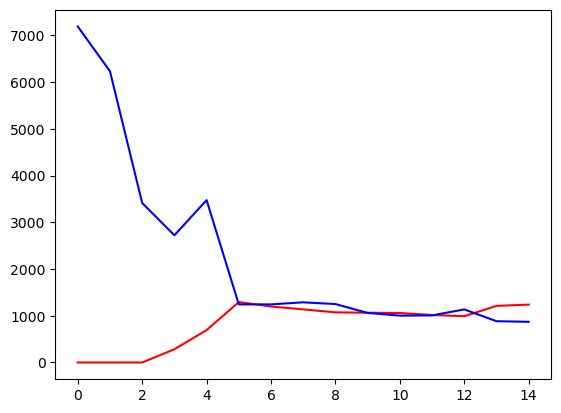

In [41]:
lr_learn = LinearRegression()
X = data[['age', 'experience']]
y = data['income']
plot_loss_learning_curve(lr_learn, X, y, 0.2)

A few rules we can apply to interpret learning curves is by looking at where and at what point do the curves stop. Let's start with the training curve:
- Training curve starts of low in error and end in a low error point at the end of the training instance
- The model performed well on the test set and went down to a low point. 

The issue here is the first point, the model training itself on the training data has maintained a very low error throughout the training set. This is an indicator that the model is overfitting (it's picked up almost all sensitivities in the dataset to well).

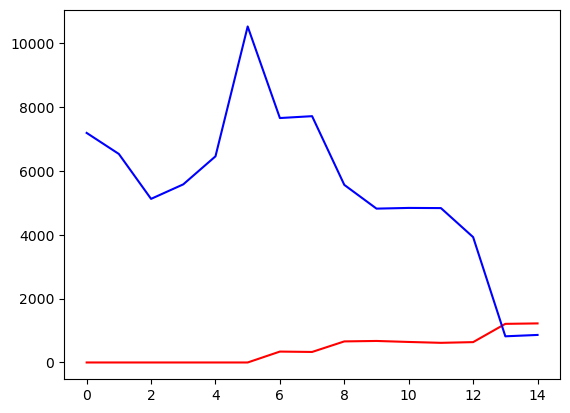

In [42]:
plot_loss_learning_curve(lr_poly, X, y, 0.2)

In this example, we can see the training curve is also starting at a low error rate and continues to maintain and converge at a low error. This is also another indication of overfitting. 

Thus, there are a few ways we can interpret learning curves

It is overfitting if:
- The training error gradually converges to a low error BUT the test error plateus quickly at a higher error rate
- Both the training and test error gradually converges to a low error BUT during training the test error begins to increase.
- The training error starts low in error and converges to a low error 

It is undedrfitting if:
- The training error plateus quickly maintaining a high error 
- The gap between the training error and test error is massive throughout the training timeline
- training error and test error begins to plateu late in the training timeline, maintaining a gap

Overall, we want a model's complexity to be:
- Accurate but inconsistent on average
- Consistent but inaccurate on average

Therefore we want a balance between them. We want to increase the model's complexity so that it can better understand the patterns in the data (increase the bias, reduce variance) but also to a point where the model can generalize well on new datasets (increase the variance, reduce the bias).

<h1>Regularization</h1>

- regularization is the process of reducing the polynomial degree of you model -> which reduces the chance of <b>overfitting</b>
- take a regularization term $\alpha$ and multiply it to the cost function
- Forces the model not just fit the data but keep the model weights as small as possible
- Regularization should only be added to the cost function during training. Once trained, use unregularised performance measures to evaluate the model's performance.
 
<b>NOTE: cost functions could be used to train the model but could be different for performance measures e.g. logloss for training classifiers and precision/recall for performance measures.</b>

<h2>Ridge Regression</h2>

$\alpha$ controls the regularization of the cost function.

- if $\alpha$ equals 0, it will just act as a normal regression model
- if $\alpha$ becomes too large, <b>it will push all uneccesary features almost to 0.</b>
- Result is a flat line going to the data's mean.

<b>NOTE: important to scale data training data before performing Ridge Regression</b>

Example of code:

In [43]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver = 'cholesky')
X = data[['age', 'experience']]
y = data['income']
ridge_reg.fit(X, y)


Ridge(alpha=1, solver='cholesky')

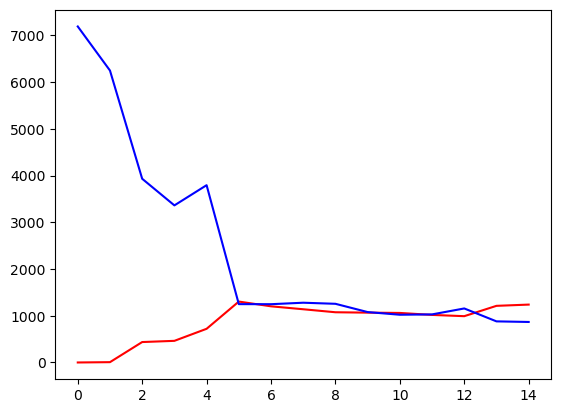

In [44]:
plot_loss_learning_curve(ridge_reg, X, y, 0.2)

If we use ridge with SGD:

In [45]:
ridge_sgd = SGDRegressor(max_iter=1000000000, penalty='l2', eta0=.0001)
ridge_sgd.fit(X,y)

SGDRegressor(eta0=0.0001, max_iter=1000000000)

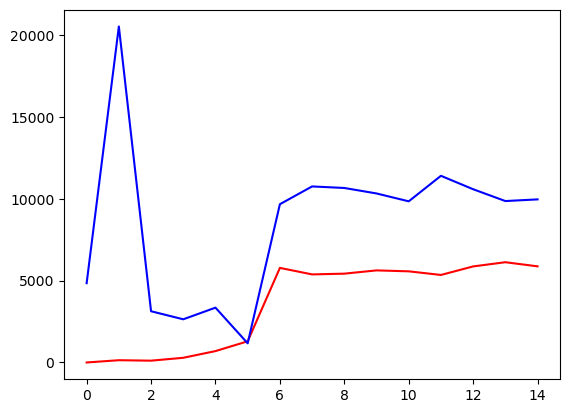

In [47]:
plot_loss_learning_curve(ridge_sgd, X, y, 0.2)

<h2>Lasso Regression</h2>
Another form of regularization but instead it shrinks unimportant features to .
- Adds regularization term to cost function
- To avoid GD algorithms frokm bouncing around the optimum at the end of lasso, gradually reduce the learning rate during training

Example code:

In [48]:
lasso_sgd = SGDRegressor(penalty='l1')
lasso_sgd.fit(X,y)

SGDRegressor(penalty='l1')

We could also use Lasso library:

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1000000000000000)
lasso.fit(X,y)

Lasso(alpha=1000000000000000)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


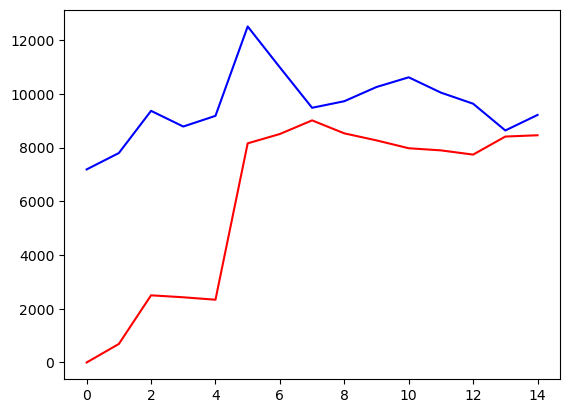

In [50]:
plot_loss_learning_curve(lasso, X, y, 0.2)

<h2>Elastic Net</h2>

Elastic Net is a middle ground between Ridge and Lasso.

- Regularization term is a mix ratio of r, when r = 0, it is equivalent to Ridge, when r=1 it is equivalent to Lasso.

Example code:

In [51]:
from sklearn.linear_model import ElasticNet

el_net = ElasticNet(alpha=1, l1_ratio=0.5)
el_net.fit(X, y)

ElasticNet(alpha=1)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


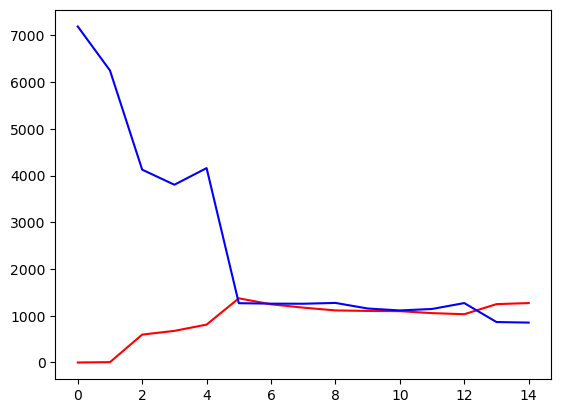

In [52]:
plot_loss_learning_curve(el_net, X, y, 0.2)

<h2>Early Stopping</h2>

- We can stop the regularized learning of algorithms such SGD by stopping the training as soon as the validation error reaches a minimum.
- With stochastic and mini-batch, we dont always know how smooth the curve is and hard to know if it reached the global minimum
- A solution:
    - Stop as soon as the validation error has been above the minimum.
    - Then if you know that the model wont do any better, move the model parameters back to the point where the validation error was at a minimum.

Example of the code:

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.base import clone

scaler = StandardScaler()
X_train_fit = scaler.fit_transform(X_train)
X_test_trans = scaler.transform(X_test)

sgd_early = SGDRegressor(warm_start = True, penalty=None, learning_rate='constant', eta0=0.1)

minimum_test_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_early.fit(X_train_fit, y_train)
    y_test_pred = sgd_early.predict(X_test_trans)
    test_error = mean_squared_error(y_test, y_test_pred)
    if test_error < minimum_test_error:
        minimum_test_error = test_error
        best_epoch = epoch
        best_model = clone(sgd_early)

print(minimum_test_error) #best error to stop
print(best_epoch) #best epoch or no. of times to go over the data

2183588.1918441467
139


<h2>When to choose between regularization or linear regression</h2>

- Should always avoid using plain linear regression
- Ridge is good by default
- if only few features (m): Lasso Regression or Elastic net since they reduce most unimportant features to 0.

Overall, Elastic Net is preferred over Lasso regression because Lasso may have erratic behaviours when:
- the number of features is greater than the number of instances OR
- when several features arew strongly correlated (multi-collinearity)


<h1>Logistic Regression</h1>

- Estimates the probability that an instance belongs to a class
- if the possibility of the instance belonging to a class is 50%, it's called the positive class, labelled as "1".
- Otherwise, it will belong to the other class (negative class, labelled "0"). 
- Also known as a <b>Binary Classifier</b>

<h2>How does it work?</h2>

- Logistic regression works by taking the weighted sum of the input features (similar to Linear Regression), instead of a weighted sum, it takes it's logistic.
- Logistic regression is based on the <b>sigmoid function</b>

$$
  prob = h_{\theta}(x) = sig(x^{T}\theta)
  \\
  sig = sigmoid \ function\\
  x^{T} = instance's feature \ vector \ transposed\\
  \theta = parameter\ vector\\
  h_{\theta} = hypothesis \ function \ using \ \theta
$$

Once $prob$ is calculated, the model then estimates the probability basd of the classes, making it's prediction easy

$$
y_{pred} = 0 \ , prob < .5 \\
y_{pred} = 1 \ , prob > .5
$$

The logistic regression model is trained using the following cost function based off the parameter vector $\theta$ where its estimated for the positive class if $prob >= 0.5$ (y = 1) or $prob <= 0.5$ (y = 0):

$$
    cost function(\theta) = -log(prob), y = 1 \\
    cost function(\theta) = -log(1-prob), y = 0
$$

- there is no known closed form equation to compute $\theta$ that minimizes the cost function.
- the cost function is convex, so SGD will work well and find a minimum (if learning rate isnt too high)
- the partial derviative of the cost function is very similar to batch gradient descen't partial derivative. Instead
    - it computes the prediction error and multiplies it by the $j^{th}$ feature value, then computes the average over all instances in training set
    - Once you have all gradient vectors with their partial derivatives, you can then use batch gradient descent
    - For SGD, take an instance
    - For Mini-batch, take small mini-batches

<h2>Decision Boundaries</h2>

In [54]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()
X_iris = iris['data'][:, 3:] #width of petal
y_iris = (iris['target'] == 2).astype(int) #iris virginica class 

<b>NOTE: Very important that we only select ONE CLASS/LABEL to predict, since we are calculating the odds of that specific class occuring AND not occuring</b>

In [55]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_iris, y_iris)

LogisticRegression()

In [56]:
log_reg.predict([[1.7]])

array([1])

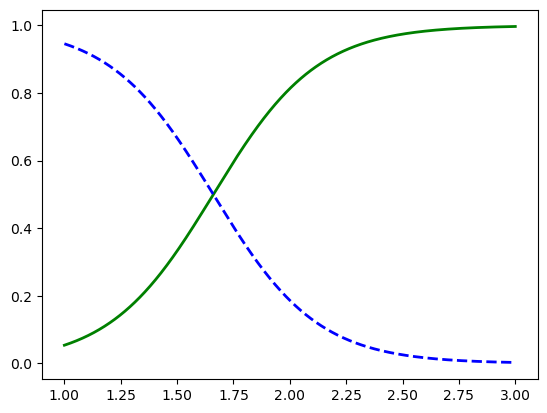

In [57]:
X_new = np.linspace(1, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

Logistic regression models can be regularized, hyperparameter controlling it is C, the higher C is the less the model is regularized. 

In [61]:
import pandas as pd

a = 10 + 12
print(a)
print(a*2)

22
44
